Load dataframes with acf and calculate tau

In [1]:
import pandas as pd
import numpy as np
import sys
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Get the data

In [2]:
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'
save_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

In [3]:
# get tau dfs
pfdl_tau_df_pearson = pd.read_pickle(results_folder + '\\binned\\pfdl\\taus\\tau_acf_trial_pearsonr_df_50ms_20lags_df.pkl')
pfdl_tau_df_proper = pd.read_pickle(results_folder + '\\binned\\pfdl\\taus\\tau_acf_trial_proper_df_50ms_20lags_df.pkl')
pfdl_tau_df_proper_isttc = pd.read_pickle(results_folder + '\\non_binned\\pfdl\\taus\\tau_acf_trial_isttc_df_50ms_20lags_df.pkl')

pfp_tau_df_pearson = pd.read_pickle(results_folder + '\\binned\\pfp\\taus\\tau_acf_trial_pearsonr_df_50ms_20lags_df.pkl')
pfp_tau_df_proper = pd.read_pickle(results_folder + '\\binned\\pfp\\taus\\tau_acf_trial_proper_df_50ms_20lags_df.pkl')
pfp_tau_df_proper_isttc = pd.read_pickle(results_folder + '\\non_binned\\pfp\\taus\\tau_acf_trial_isttc_df_50ms_20lags_df.pkl')

#get nan dfs
pfdl_nan_df = pd.read_pickle(results_folder + 'pfdl_tau_acf_trial_nan_df_50ms_20lags_df.pkl')
pfp_nan_df = pd.read_pickle(results_folder + 'pfp_tau_acf_trial_nan_df_50ms_20lags_df.pkl')

In [4]:
pfdl_tau_df_pearson['area'] = 'pfdl'
pfdl_tau_df_proper['area'] = 'pfdl'
pfdl_tau_df_proper_isttc['area'] = 'pfdl'

pfp_tau_df_pearson['area'] = 'pfp'
pfp_tau_df_proper['area'] = 'pfp'
pfp_tau_df_proper_isttc['area'] = 'pfp'

pfdl_nan_df['area'] = 'pfdl'
pfp_nan_df['area'] = 'pfp'

In [ ]:
pfdl_nan_df

In [5]:
pfdl_tau_df_merged = pfdl_tau_df_proper.merge(pfdl_tau_df_proper_isttc, on=['unit_id','trial_id'], how='inner', 
                                           suffixes=('_proper', '_isttc'))

pfp_tau_df_merged = pfp_tau_df_proper.merge(pfp_tau_df_proper_isttc, on=['unit_id','trial_id'], how='inner', 
                                           suffixes=('_proper', '_isttc'))

tau_df_concat = pd.concat([pfdl_tau_df_merged, pfp_tau_df_merged])
tau_df_concat.reset_index(inplace=True, drop=True)

tau_df_concat['diff'] = tau_df_concat['r_squared_isttc'] - tau_df_concat['r_squared_proper']

tau_df_concat

,unit_id,trial_id,fit_a_proper,fit_b_proper,fit_c_proper,tau_proper,r_squared_proper,tau_ms_proper,area_proper,fit_a_isttc,fit_b_isttc,fit_c_isttc,tau_isttc,r_squared_isttc,tau_ms_isttc,area_isttc,diff
0,0,0,-0.802159,2.974937,0.030515,0.336142,6.968259e-03,16.807079,pfdl,78457.993016,11.499514,0.000003,0.086960,0.273803,4.348010,pfdl,0.266835
1,0,1,-0.138741,0.353294,0.055076,2.830504,2.900311e-02,141.525178,pfdl,71111.891490,11.499571,0.000004,0.086960,0.165623,4.347988,pfdl,0.136620
2,0,2,1.255381,1.098888,-0.050027,0.910011,3.580787e-01,45.500561,pfdl,20619.167265,10.437317,0.000010,0.095810,0.095554,4.790503,pfdl,-0.262525
3,0,3,-274.843932,8.786484,0.000109,0.113811,1.084443e-02,5.690559,pfdl,0.291657,0.638727,3.020830,1.565614,0.018442,78.280691,pfdl,0.007598
4,0,4,0.742451,0.495002,-0.118697,2.020194,5.488022e-01,101.009688,pfdl,3.037171,1.137634,0.016195,0.879017,0.226135,43.950854,pfdl,-0.322667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38578,542,33,-0.033670,16.762217,0.860286,0.059658,-5.844412e-10,2.982899,pfp,3.234331,1.128050,-0.022903,0.886485,0.579731,44.324257,pfp,0.579731
38579,542,34,-1.164548,1.893982,0.014434,0.527988,7.230842e-02,26.399412,pfp,4.848787,1.605498,0.004779,0.622860,0.187064,31.142983,pfp,0.114755
38580,542,36,2.276697,1.530584,-0.027827,0.653346,4.768094e-01,32.667278,pfp,110214.217983,12.001564,0.000001,0.083322,0.190557,4.166124,pfp,-0.286252
38581,542,37,1.060471,0.764627,-0.076105,1.307827,5.329802e-01,65.391355,pfp,4.083977,1.625780,0.049060,0.615089,0.185751,30.754469,pfp,-0.347229


In [6]:
proper_tau_concat_df = pd.concat([pfdl_tau_df_proper, pfp_tau_df_proper])
isttc_tau_concat_df = pd.concat([pfdl_tau_df_proper_isttc, pfp_tau_df_proper_isttc])

#### Plots

In [7]:
fig_folder='E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'
save_fig=True

In [14]:
pfdl_nan_df

,acf_nan_perc,tau_nan_perc,metric,area
0,83.366054,10.273605,Pearson,pfdl
1,0.000000,2.989470,ACF proper,pfdl
2,0.000000,2.408541,iSTTC,pfdl


C:\Users\ipochino\AppData\Local\Temp\ipykernel_7492\3037093423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], x='metric', y='acf_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
C:\Users\ipochino\AppData\Local\Temp\ipykernel_7492\3037093423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], x='metric', y='tau_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
C:\Users\ipochino\AppData\Local\Temp\ipykernel_7492\3037093423.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

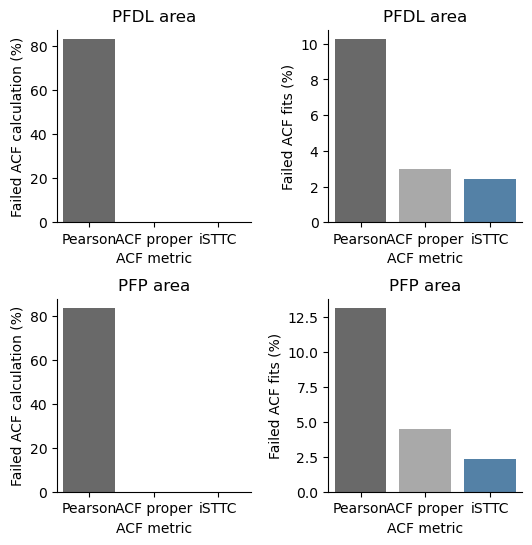

In [8]:
# percentage of nans in ACF and in tau - bar plots
fig, axes = plt.subplots(2,2, figsize=(6,6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(ax=axes[0,0], x='metric', y='acf_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
sns.barplot(ax=axes[0,1], x='metric', y='tau_nan_perc', data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)

axes[0,0].set_title('PFDL area')
axes[0,1].set_title('PFDL area')
axes[0,0].set_ylabel('Failed ACF calculation (%)')
axes[0,1].set_ylabel('Failed ACF fits (%)')

sns.barplot(ax=axes[1,0], x='metric', y='acf_nan_perc', data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)
sns.barplot(ax=axes[1,1], x='metric', y='tau_nan_perc', data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'], legend=False)

axes[1,0].set_title('PFP area')
axes[1,1].set_title('PFP area')
axes[1,0].set_ylabel('Failed ACF calculation (%)')
axes[1,1].set_ylabel('Failed ACF fits (%)')

for ax in axes.flat:
    ax.set_xlabel('ACF metric')

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms.svg' , bbox_inches='tight')

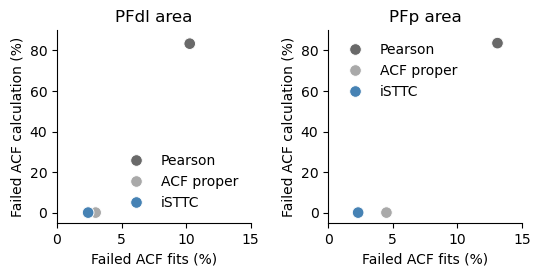

In [9]:
# percentage of nans in ACF and in tau - bar plots
fig, axes = plt.subplots(1,2, figsize=(6,2.5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_nan_perc', y='acf_nan_perc', hue='metric', s=70,
                data=pfdl_nan_df, palette=['dimgray', 'darkgrey','steelblue'])

sns.scatterplot(ax=axes[1], x='tau_nan_perc', y='acf_nan_perc', hue='metric', s=70,
                data=pfp_nan_df, palette=['dimgray', 'darkgrey','steelblue'])

axes[0].set_title('PFdl area')
axes[1].set_title('PFp area')

for ax in axes.flat:     
    ax.set_ylabel('Failed ACF calculation (%)')
    ax.set_xlabel('Failed ACF fits (%)')
    ax.legend(frameon=False)
    ax.set_xlim([0,15])
    ax.set_ylim([-5,90])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms_scatter.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_pearson_vs_proper_trail_fit_0_1000_20_50ms_scatter.svg' , bbox_inches='tight')

In [10]:
n_proper_better = len(proper_tau_concat_df.query(' r_squared > 0.8'))
n_proper_better_perc = n_proper_better / len(proper_tau_concat_df) * 100
print(n_proper_better_perc)

n_isttc_better = len(isttc_tau_concat_df.query(' r_squared > 0.8'))
n_isttc_better_perc = n_isttc_better / len(isttc_tau_concat_df) * 100
print(n_isttc_better_perc)

6.309508696204139
12.908004662910432


In [11]:
n_proper_better2 = len(proper_tau_concat_df.query(' r_squared > 0.5'))
n_proper_better_perc2 = n_proper_better2 / len(proper_tau_concat_df) * 100
print(n_proper_better_perc2, n_proper_better2, len(tau_df_concat))

n_isttc_better2 = len(isttc_tau_concat_df.query(' r_squared > 0.5'))
n_isttc_better_perc2 = n_isttc_better2 / len(tau_df_concat) * 100
print(n_isttc_better_perc2, n_isttc_better2, len(isttc_tau_concat_df))

15.518598451187 6112 38583
29.52854884275458 11393 41176


In [17]:
r_squared_df = pd.DataFrame(np.vstack(([0.5, 0.5, 0.8, 0.8],
                                       [n_proper_better_perc, n_isttc_better_perc, n_proper_better_perc2, n_isttc_better_perc2], 
                                       ['ACF proper', 'iSTTC', 'ACF proper', 'iSTTC'])).T, 
                            columns=['r_squared', 'perc', 'metric'])
r_squared_df['perc'] = r_squared_df['perc'].astype(float)
r_squared_df['metric'] = r_squared_df['metric'].astype('category')
print(r_squared_df['metric'].unique())
r_squared_df

['ACF proper', 'iSTTC']
Categories (2, object): ['ACF proper', 'iSTTC']


,r_squared,perc,metric
0,0.5,6.309509,ACF proper
1,0.5,12.908005,iSTTC
2,0.8,15.518598,ACF proper
3,0.8,29.528549,iSTTC


In [16]:
r_squared_df.query('r_squared == "0.5"')

,r_squared,perc,metric
0,0.5,6.309509,ACF proper
2,0.5,15.518598,ACF proper


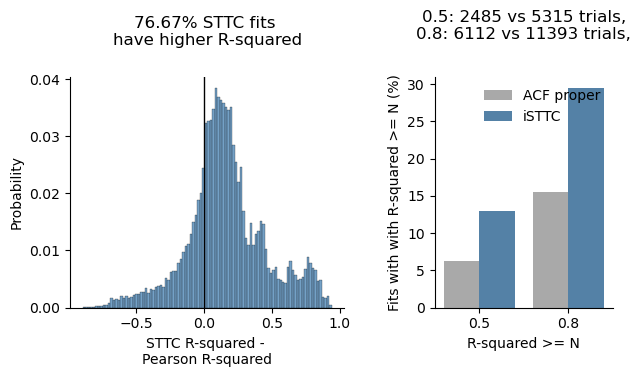

In [39]:
# r-squared of sttc and proper acf

n_sttc_better = len(tau_df_concat.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(tau_df_concat) * 100

fig, axes = plt.subplots(1,2, figsize=(7,3), gridspec_kw={'width_ratios': [2, 1.3]})
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=tau_df_concat['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[0].axvline(x=0, lw=1, c='k')
axes[0].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[0].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)), y=1.1)

sns.barplot(ax=axes[1], x='r_squared', y='perc', hue='metric', data=r_squared_df, palette=['darkgrey','steelblue'])

axes[1].set_ylabel('Fits with with R-squared >= N (%)')
axes[1].set_xlabel('R-squared >= N')
axes[1].legend(frameon=False)

axes[1].set_title('0.5: ' + str(n_proper_better) + ' vs ' + str(n_isttc_better) + ' trials,\n' + '0.8: ' 
                  + str(n_proper_better2) + ' vs ' + str(n_isttc_better2) + ' trials,\n', y=1.05)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_proper_trail_fit_0_1000_20_50ms.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_proper_trail_fit_0_1000_20_50ms.svg' , bbox_inches='tight')